In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\Ex_CEOSalary.csv",encoding='utf-8')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [5]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


# 1. 범주형 자료의 탐색

In [6]:
# industry
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [29]:
data['industry'].replace([1,2,3,4], ['Service','Finance','IT','Ohters'],inplace =True)

In [15]:
data.loc[:,'industry'].value_counts()

Service    72
IT         60
Finance    46
Ohters     31
Name: industry, dtype: int64

In [16]:
data['industry'].value_counts()

Service    72
IT         60
Finance    46
Ohters     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

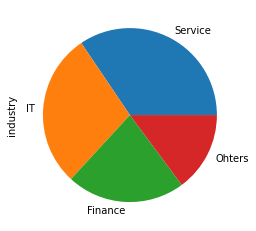

In [21]:
%matplotlib inline

data['industry'].value_counts().plot(kind="pie")

<AxesSubplot:>

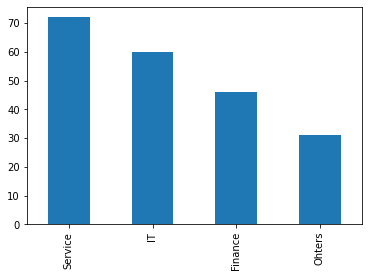

In [22]:
data['industry'].value_counts().plot(kind='bar')

In [25]:
data.describe()
# 주목해야할 점은 평균과 중위수의 차이가 큰지 아닌지, 클수록 이상치가 많다

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [27]:
data.skew() # 왜도

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

모두 0보다 큼, 우측꼬리분포 형태
특히 salary와 sales는 2보다 크므로 왼쪽으로 치우처져 있다고 볼 수 있음. 0일때가 대칭

In [33]:
data.kurt() # 첨도 data.kurtosis도 가능

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

첨도 또한 salary와 sales가 매우 높음. 0일때 정규분포, 값이 클수록 중심에 값이 많이 몰려있다는 의미

In [34]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [40]:
data.quantile()

salary    1039.000000
sales     3705.199951
roe         15.500000
Name: 0.5, dtype: float64

In [65]:
data[data['salary']==min(data['salary'])] # 최솟갑 찾기

,salary,sales,roe,industry
132,223,181.5,22.700001,IT


In [66]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

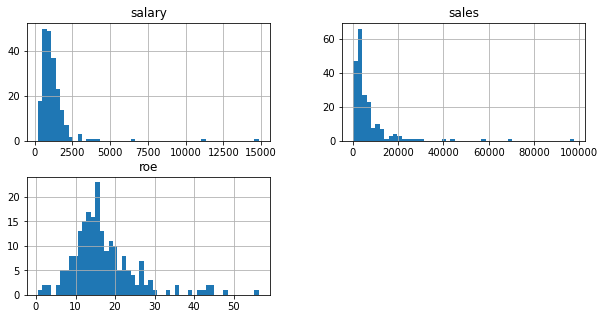

In [70]:
data.hist(bins =50, figsize=(10,5)) # bin은 구간 너비

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

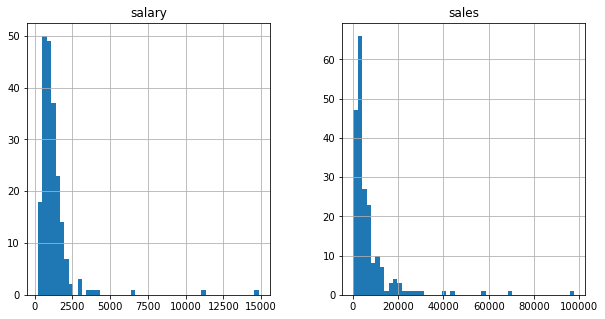

In [72]:
data[['salary','sales']].hist(bins =50, figsize=(10,5))

# 2. 이변량 데이터 탐색

In [74]:
data.corr(method='pearson')

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [79]:
print(data.corr(method='spearman'),"\n",data.corr(method='kendall'))

          salary     sales       roe
salary  1.000000  0.528016  0.205984
sales   0.528016  1.000000 -0.170548
roe     0.205984 -0.170548  1.000000 
           salary     sales       roe
salary  1.000000  0.363921  0.143672
sales   0.363921  1.000000 -0.123844
roe     0.143672 -0.123844  1.000000


In [4]:
import matplotlib.pyplot as plt

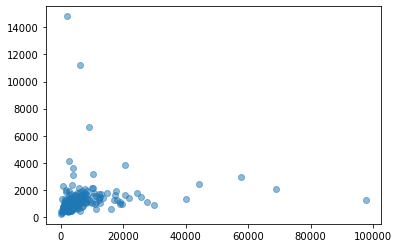

In [84]:
plt.scatter(data['sales'],data['salary'],alpha=0.5 )

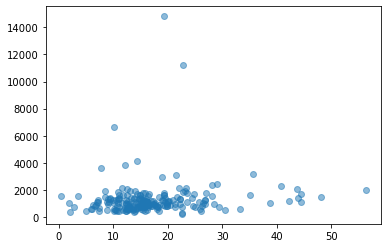

In [85]:
plt.scatter(data['roe'],data['salary'],alpha=0.5 )

In [88]:
data.groupby('industry').describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
IT         60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
Ohters     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                  sales               ...                              roe  \
              max count         mean  ...          75%           max count   
industry                              ...                                    
Finance    6640.0  46.0  5844.047793  ...  6697.900024  24332.000000  46.0   
IT        14822.0  60.0  8080.148297  ...  7719.500000  97649.898438  60.0   
Ohters     1100.0  31.0  3382.474180  ...  4080.350098   9470.099609  31.0   
Service    3844.0  72.0  8174.736113  ...  8402.500000  69018.000000  72.0   

                                                                           
               mean        std  min     25%        50%     75%        max  
industry                                                                   
Finance   14.328261   5.864153  0.5  10.950  14.750000  16.475  33.299999  
IT        22.655000  10.199309  2.1  15.675  21.400000  26.925  48.099998  
Ohters    11.293548   3.151289  2.9   9.550  12.300000  13.700  15.500000  
Service   16.986111   7.374400  1.9  13.100  16.150001  19.525  56.299999  

[4 rows x 24 columns]

In [93]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
IT         60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
Ohters     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance    6640.0  
IT        14822.0  
Ohters     1100.0  
Service    3844.0

# 3. 이상치 처리 

In [3]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb8c77f760>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb8c77fe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb8c77f520>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb8c789520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb8c789880>],
 'means': []}

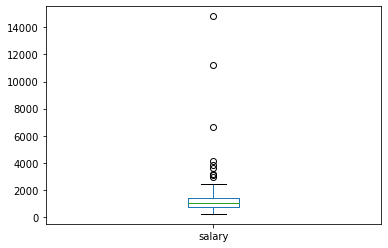

In [9]:
data['salary'].plot(kind='box',return_type = 'dict') # return_type은 axes, dict, both 세가지

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001EB8C850130>, <matplotlib.lines.Line2D object at 0x000001EB8C850490>], 'caps': [<matplotlib.lines.Line2D object at 0x000001EB8C8507F0>, <matplotlib.lines.Line2D object at 0x000001EB8C850B50>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001EB8C83FDF0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001EB8C850EB0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001EB8C85A250>], 'means': []})

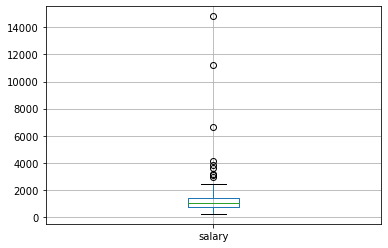

In [11]:
data.boxplot(column = 'salary', return_type = 'both')

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001EB8C65F850>, <matplotlib.lines.Line2D object at 0x000001EB8C65FBB0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001EB8C65FF10>, <matplotlib.lines.Line2D object at 0x000001EB8C66C2B0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001EB8C65F4F0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001EB8C66C610>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001EB8C66C970>], 'means': []})

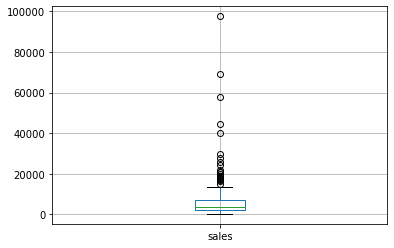

In [6]:
data.boxplot(column = 'sales', return_type = 'both')

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001EB8C6C1BB0>, <matplotlib.lines.Line2D object at 0x000001EB8C6C1F10>], 'caps': [<matplotlib.lines.Line2D object at 0x000001EB8C6CF2B0>, <matplotlib.lines.Line2D object at 0x000001EB8C6CF610>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001EB8C6C1850>], 'medians': [<matplotlib.lines.Line2D object at 0x000001EB8C6CF970>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001EB8C6CFCD0>], 'means': []})

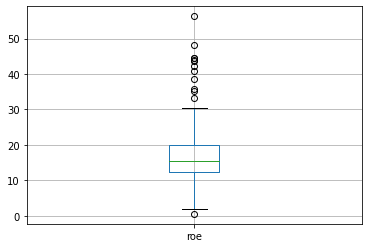

In [7]:
data.boxplot(column = 'roe', return_type = 'both')

------------------------------------------------------------------------------------------------------------------------

변수 이상치 처리, 주관적 판단이 기준, 여기서는 IQR 기준으로 이상치 제거, 
3분위수 - 1분위수가 IQR(inter quantile range)
- (1분위수 - 1.5*IQR) < x < (3분위수 + 1.5*QR)

In [13]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary 
IQR_salary

671.0

In [31]:
data_IQR = data[(data['salary']<Q3_salary+1.5*IQR_salary)&(data['salary']>Q1_salary-1.5*IQR_salary)]

<AxesSubplot:>

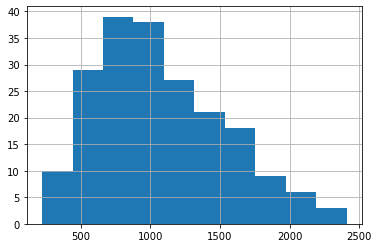

In [39]:
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

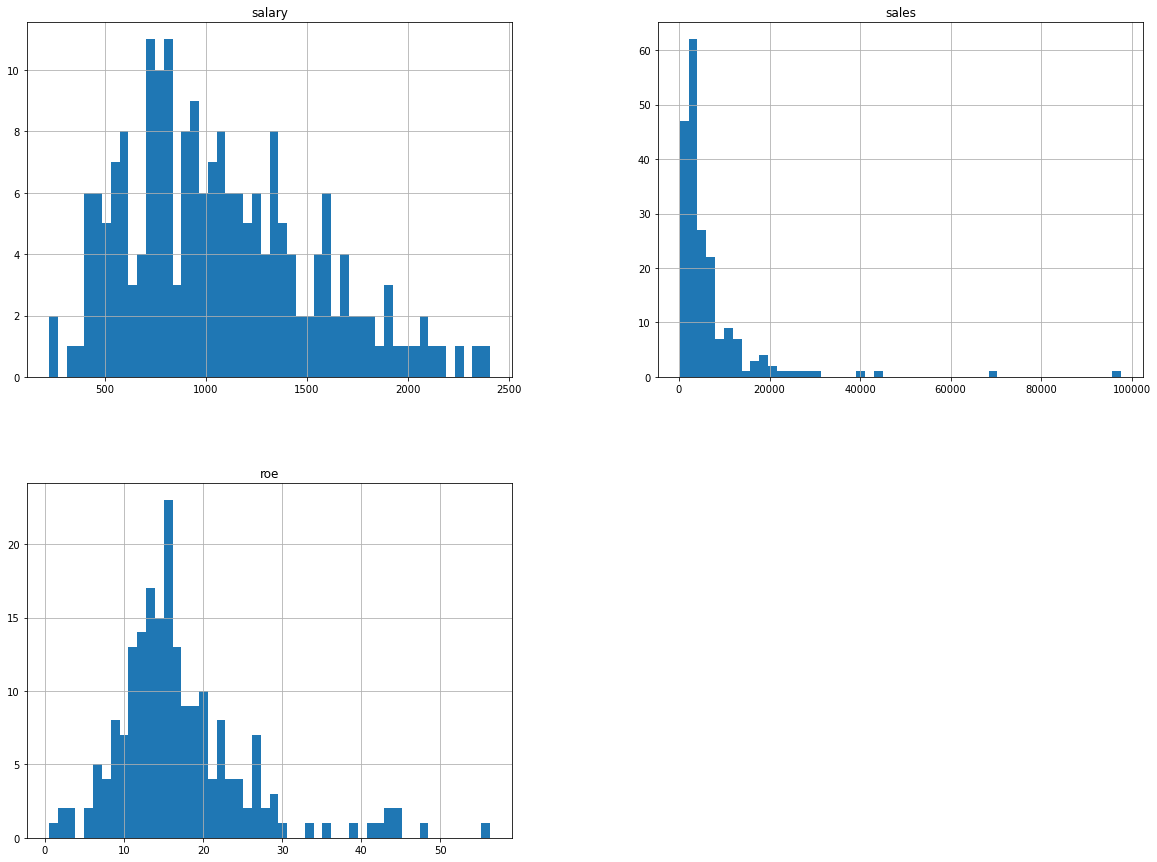

In [48]:
data_IQR.hist(bins=50,figsize=(20,15))

In [50]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


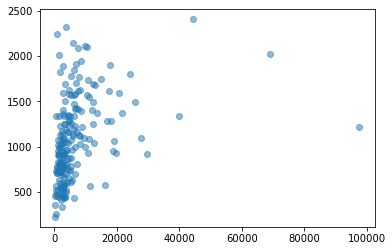

In [54]:
plt.scatter(data_IQR['sales'],data_IQR['salary'],alpha=0.5)

In [60]:
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales - Q1_sales 
data_IQR = data[(data['sales']<Q3_sales+1.5*IQR_sales)&(data['sales']>Q1_sales-1.5*IQR_sales)&(data['salary']<Q3_salary+1.5*IQR_salary)&(data['salary']>Q1_salary-1.5*IQR_salary) ]

<AxesSubplot:>

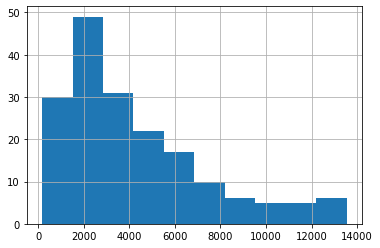

In [61]:
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

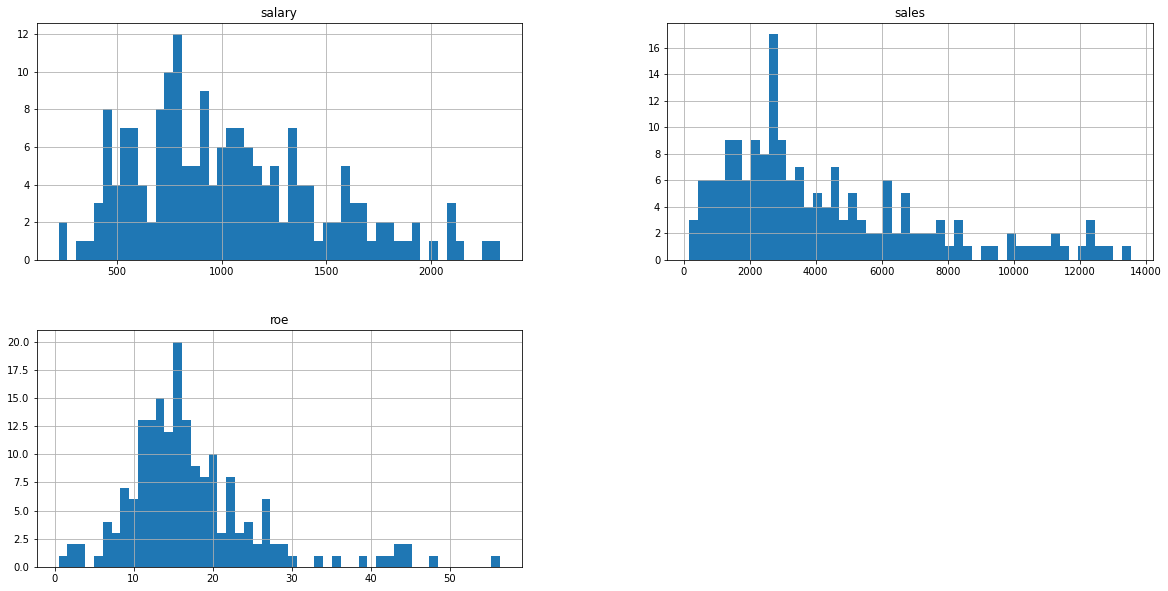

In [62]:
data_IQR.hist(bins=50,figsize=(20,10))

In [63]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


In [66]:
data_IQR = data[(data['salary']<Q3_salary+1.5*IQR_salary)&(data['salary']>Q1_salary-1.5*IQR_salary)]
data_IQR = data_IQR[(data_IQR['sales']<Q3_sales+1.5*IQR_sales)&(data_IQR['sales']>Q1_sales-1.5*IQR_sales) ]

In [67]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


# 4. 변수 변환

In [68]:
data[['log_salary']]=np.log(data['salary'])
data[['log_sales']]=np.log(data['sales'])
data[['log_roe']]=np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'log_salary'}>],
       [<AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>]], dtype=object)

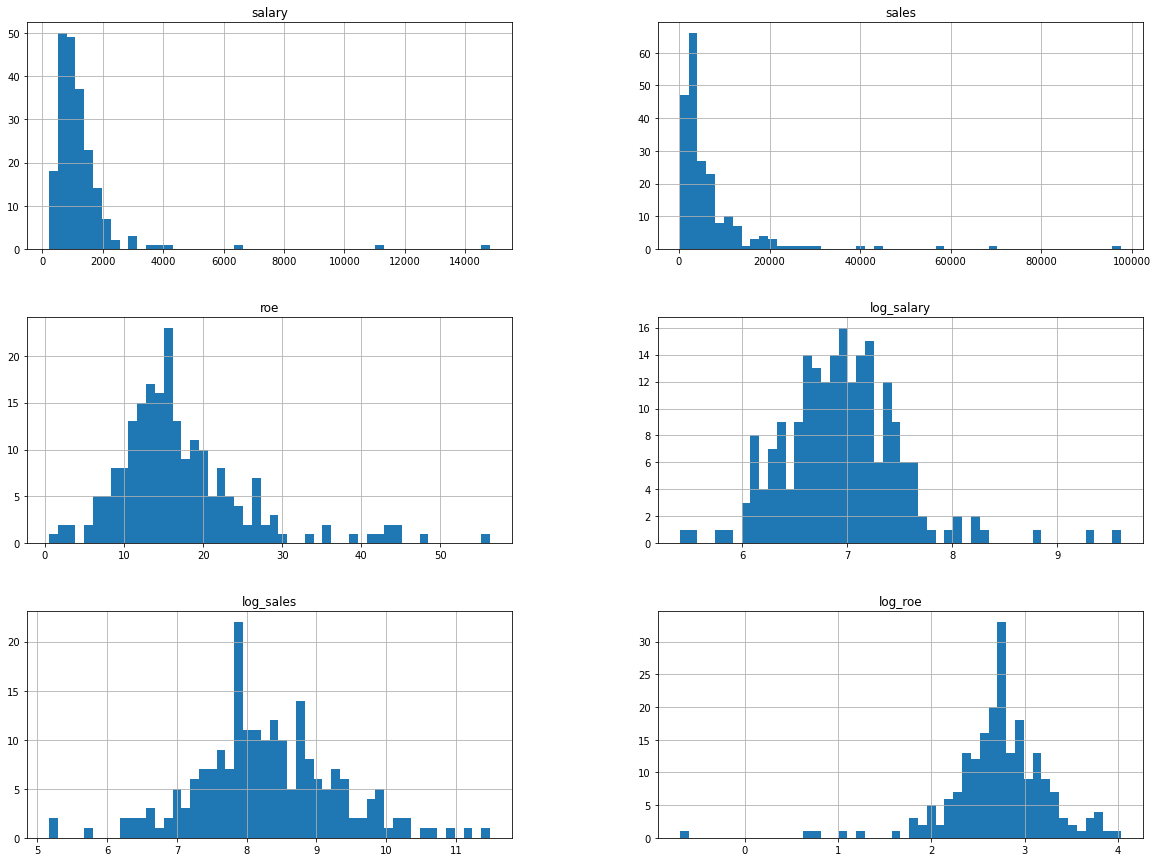

In [69]:
data.hist(bins=50,figsize=(20,15))

In [70]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


<AxesSubplot:title={'center':'Person Correlation of Features'}>

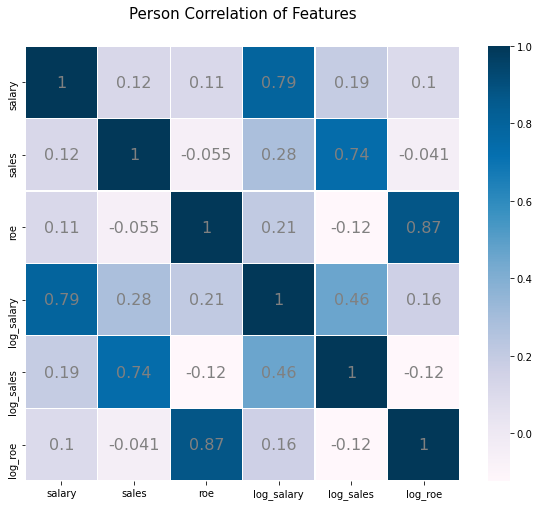

In [79]:
import seaborn as sns
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(data.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, 
            linecolor = "white", annot = True, annot_kws = {'color':'gray',"size" : 16})

In [80]:
data[['sqrt_salary']]=np.sqrt(data['salary'])
data[['sqrt_sales']]=np.sqrt(data['sales'])
data[['sqrt_roe']]=np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>],
       [<AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>,
        <AxesSubplot:title={'center':'sqrt_roe'}>]], dtype=object)

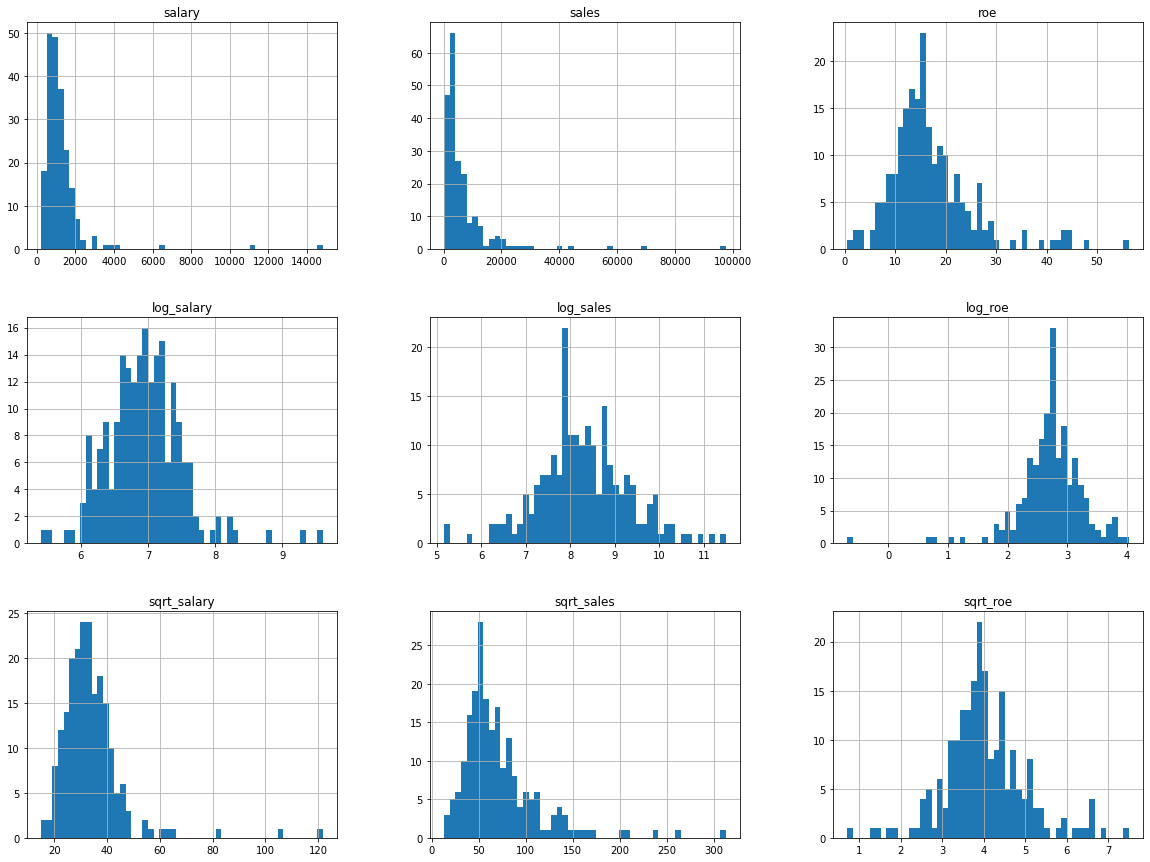

In [81]:
data.hist(bins=50,figsize=(20,15))

In [82]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


# 5.결측치 처리

In [87]:
import pandas as pd

data = pd.read_csv("C:\\Users\\user\빅분기 실기\\[1]BigData_data_최종본(0910)\\Ex_Missing.csv",encoding='utf-8')

In [100]:
data.describe()

,salary,sales,roe,industry
count,8.00000,8.000000,9.000000,10.000000
mean,1053.50000,9069.825012,14.600000,1.500000
std,244.84339,8838.605333,5.262841,0.527046
min,578.00000,2266.699951,5.900000,1.000000
25%,1016.75000,2932.600037,10.900000,1.000000
50%,1094.50000,5348.050049,14.100000,1.500000
75%,1168.00000,11530.000000,16.400000,2.000000
max,1368.00000,27595.000000,23.500000,2.000000


In [116]:
pd.isnull(data)

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [113]:
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [117]:
pd.notnull(data)
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [141]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
missing     0
valid       0
dtype: int64

In [120]:
data['salary'].isnull().sum()

2

In [119]:
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [126]:
for col in data.columns:
    print("{:<10} has {:>3}% Null data.".format(col.upper(), int(100*data[col].isnull().sum()/data[col].shape[0])))

SALARY     has  20% Null data.
SALES      has  20% Null data.
ROE        has  10% Null data.
INDUSTRY   has   0% Null data.


In [133]:
data.isnull().sum(1) # 행별 결측값 개수 구하기

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [136]:
data['missing'] = data.isnull().sum(1)
data

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [137]:
data['valid'] = data.notnull().sum(1) # 실측값 개수
data

,salary,sales,roe,industry,missing,valid
0,1095.0,27595.000000,14.100000,1,0,5
1,NaN,9958.000000,10.900000,1,1,4
2,NaN,6125.899902,23.500000,1,1,4
3,578.0,16246.000000,5.900000,1,0,5
4,1368.0,NaN,13.800000,1,1,4
5,1145.0,NaN,20.000000,2,1,4
6,1078.0,2266.699951,16.400000,2,0,5
7,1094.0,2966.800049,16.299999,2,0,5
8,1237.0,4570.200195,10.500000,2,0,5
9,833.0,2830.000000,NaN,2,1,4


In [270]:
data[(data['salary'].isnull()==True)  | (data['sales'].isnull()==True)]

,salary,sales,roe,industry
1,NaN,9958.000000,10.9,1
2,NaN,6125.899902,23.5,1
4,1368.0,NaN,13.8,1
5,1145.0,NaN,20.0,2


------------------------------------------------------------------------------------------------------------------------
- 결측치 제거

In [139]:
data_del_row = data.dropna(axis=0) # 결측값 행 제거
data_del_row

,salary,sales,roe,industry,missing,valid
0,1095.0,27595.000000,14.100000,1,0,5
3,578.0,16246.000000,5.900000,1,0,5
6,1078.0,2266.699951,16.400000,2,0,5
7,1094.0,2966.800049,16.299999,2,0,5
8,1237.0,4570.200195,10.500000,2,0,5


In [142]:
data_del_col = data.dropna(axis=1) # 결측값 열 제거
data_del_col

,industry,missing,valid
0,1,0,5
1,1,1,4
2,1,1,4
3,1,0,5
4,1,1,4
5,2,1,4
6,2,0,5
7,2,0,5
8,2,0,5
9,2,1,4


In [149]:
data[['salary', 'sales', 'roe', 'industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [150]:
data[['salary', 'sales', 'roe', 'industry']].dropna(axis=1)

,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


In [155]:
data= data.drop(['missing','valid'],axis=1)

------------------------------------------------------------------------------------------------------------------------

 
 
 
 - 결측치 대체
    
 한 값을 넣을수도, 딕셔너리를 이용해 여러값을 넣을수도 있음
 
 apply를 통해 함수를 넣을수도 있음 

In [157]:
data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [158]:
data_missing = data.fillna('missing')
data_missing

,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2


In [159]:
data_ffill = data.fillna(method='ffill') # front fill 앞의 값으로 채우기  mehthod =pad 해도 됨
data_ffill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [160]:
data_bfill = data.fillna(method='bfill') # front fill 앞의 값으로 채우기  mehthod =backfill 해도 됨
data_bfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [162]:
data_mean = data.fillna(data.mean()) # mean으로 대체
data_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,9069.825012,13.800000,1
5,1145.0,9069.825012,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.600000,2


In [164]:
data_median = data.fillna(data.median()) # median으로 대체 max(), min()도 가능
data_median

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1094.5,9958.000000,10.900000,1
2,1094.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,5348.050049,13.800000,1
5,1145.0,5348.050049,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.100000,2


In [167]:
data_salary_mean = data[['salary']].fillna(data['salary'].mean())
data_salary_mean2 = data[['salary']].fillna(data.mean()['salary'])

In [173]:
data_salary_mean2

,salary
0,1095.0
1,1053.5
2,1053.5
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [174]:
data_other_mean = data.fillna(data['salary'].mean())

In [175]:
data_other_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1053.500000,13.800000,1
5,1145.0,1053.500000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,1053.500000,2


np.where 

In [179]:
data2 = data.copy()
data2['sales_new'] = np.where(data['sales'].notnull()==True, data['sales'],data['salary']) # notnu;;(data[sales])도 가능
data2

,salary,sales,roe,industry,sales_new
0,1095.0,27595.000000,14.100000,1,27595.000000
1,NaN,9958.000000,10.900000,1,9958.000000
2,NaN,6125.899902,23.500000,1,6125.899902
3,578.0,16246.000000,5.900000,1,16246.000000
4,1368.0,NaN,13.800000,1,1368.000000
5,1145.0,NaN,20.000000,2,1145.000000
6,1078.0,2266.699951,16.400000,2,2266.699951
7,1094.0,2966.800049,16.299999,2,2966.800049
8,1237.0,4570.200195,10.500000,2,4570.200195
9,833.0,2830.000000,NaN,2,2830.000000


------------------------------------------------------------------------------------------------------------------------

- 집단 groupby('열 이름')

- 집단평균 groupby('열 이름').mean()

- apply 이용 data.groupby('열 이름').apply(함수)
        ex) 함수 = lamba x : x.fillna(x.mean())  

In [180]:
data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224975,13.64
2,1077.400000,3158.425049,15.80


In [181]:
fill_mean_func = lambda g: g.fillna(g.mean())

In [182]:
data_group_mean= data.groupby('industry').apply(fill_mean_func)

In [183]:
data_group_mean

salary         sales        roe  industry
industry                                                  
1        0  1095.000000  27595.000000  14.100000         1
         1  1013.666667   9958.000000  10.900000         1
         2  1013.666667   6125.899902  23.500000         1
         3   578.000000  16246.000000   5.900000         1
         4  1368.000000  14981.224975  13.800000         1
2        5  1145.000000   3158.425049  20.000000         2
         6  1078.000000   2266.699951  16.400000         2
         7  1094.000000   2966.800049  16.299999         2
         8  1237.000000   4570.200195  10.500000         2
         9   833.000000   2830.000000  15.800000         2

In [287]:
fill_values ={1:1000,2:2000}
fill_func = lambda d: d.fillna(fill_values[d.name])
data_group_value = data.groupby('industry').apply(fill_func)
data_group_value

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1000.0,9958.000000,10.900000,1
2,1000.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1000.000000,13.800000,1
5,1145.0,2000.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,2000.000000,2


In [240]:
data.groupby('industry').apply(lambda x : x.fillna( x.sum()))

salary         sales        roe  industry
industry                                             
1        0  1095.0  27595.000000  14.100000         1
         1  3041.0   9958.000000  10.900000         1
         2  3041.0   6125.899902  23.500000         1
         3   578.0  16246.000000   5.900000         1
         4  1368.0  59924.899902  13.800000         1
2        5  1145.0  12633.700195  20.000000         2
         6  1078.0   2266.699951  16.400000         2
         7  1094.0   2966.800049  16.299999         2
         8  1237.0   4570.200195  10.500000         2
         9   833.0   2830.000000  63.199999         2

In [288]:
data['salary'].interpolate()
data.salary.interpolate()

0    1095.000000
1     922.666667
2     750.333333
3     578.000000
4    1368.000000
5    1145.000000
6    1078.000000
7    1094.000000
8    1237.000000
9     833.000000
Name: salary, dtype: float64

In [279]:
missing_fill = {'salary': data.salary.interpolate(), 'sales':data['sales'].mean(),'roe':"missing"}

In [280]:
missing_fill

{'salary': 0    1095.000000
 1     922.666667
 2     750.333333
 3     578.000000
 4    1368.000000
 5    1145.000000
 6    1078.000000
 7    1094.000000
 8    1237.000000
 9     833.000000
 Name: salary, dtype: float64,
 'sales': 9069.825012125,
 'roe': 'missing'}

In [281]:
data_multi = data.fillna(missing_fill)
data_multi

,salary,sales,roe,industry
0,1095.000000,27595.000000,14.1,1
1,922.666667,9958.000000,10.9,1
2,750.333333,6125.899902,23.5,1
3,578.000000,16246.000000,5.9,1
4,1368.000000,9069.825012,13.8,1
5,1145.000000,9069.825012,20.0,2
6,1078.000000,2266.699951,16.4,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.5,2
9,833.000000,2830.000000,missing,2


# ---------------------------------------------------------------------------------------------------------
# 6. 데이터정제 실전 과제

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:/Users/user/빅분기 실기/[1]BigData_data_최종본(0910)/house_raw.csv",encoding='utf-8')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [5]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

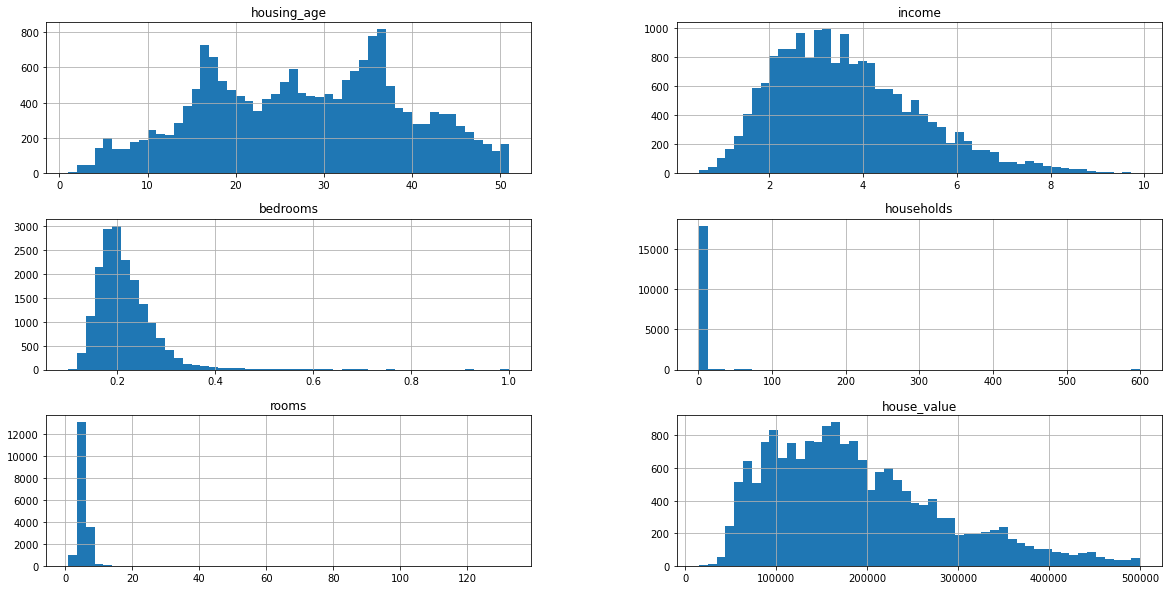

In [8]:
data.hist(bins=50, figsize=(20,10))

In [9]:
data.skew() 

housing_age     -0.066995
income           0.721457
bedrooms         2.163058
households     123.744213
rooms           17.030358
house_value      0.833038
dtype: float64

bedrooms         2.163058, households     123.744213, rooms           17.030358가 우측꼬리분포

### 정제 이전 선형회귀 적용 
house value를 예측하는 것이 목적

In [18]:
X = data[data.columns[0:5]]
y = data[[data.columns[5]]]

X , y 학습용 데이터와 테스트 데이터로 구분

In [25]:
from sklearn.model_selection import train_test_split


X_train, X_test,y_train, y_test = train_test_split(X,y, random_state= 42)

스케일링

In [26]:
from sklearn.preprocessing import MinMaxScaler # 스케일링

scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

선형회귀

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled_minmax_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5463729131516732

In [38]:
print(model.intercept_)
print(model.coef_)

[-26622.83910891]
[[  63687.21389521  515278.12860627  473711.74560225 -653492.36407112
  -141231.75918319]]


In [39]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

-2.822064801016153

### 데이터 정제

1) bedroom 

분포 확인 결과, 0.6 이상에서 매우 큰 값들 존재

0.6보다 큰 데이터를 확인, 14개의 데이터 존재 ㅡ> 제거

In [54]:
len(data)

17914

<AxesSubplot:>

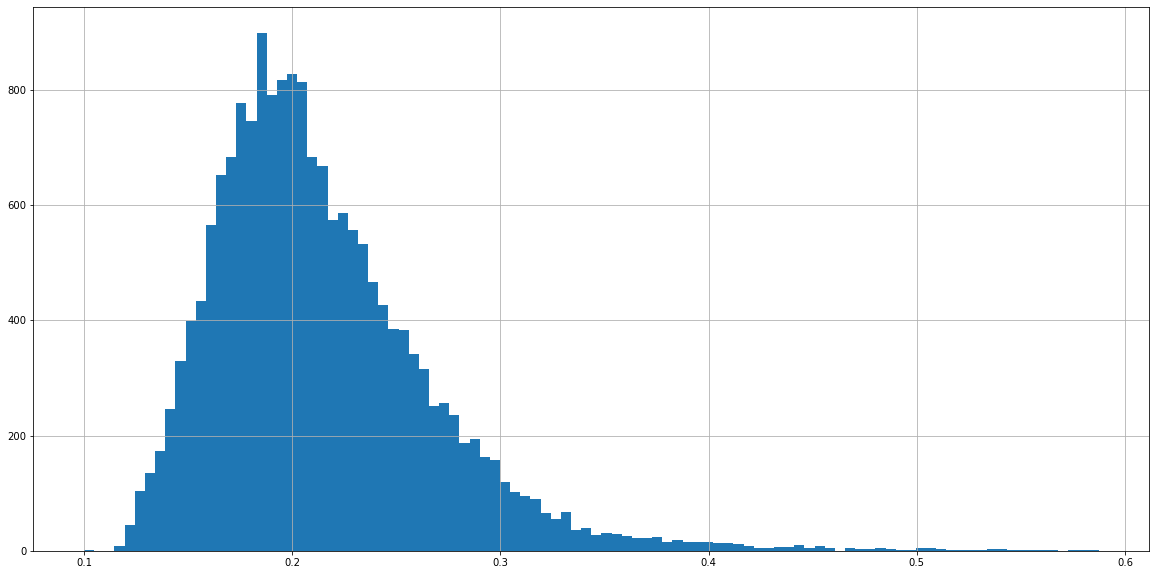

In [46]:
data['bedrooms'][data['bedrooms']<0.6].hist(bins=100,figsize=(20,10))

In [51]:
data['bedrooms'][data['bedrooms']>=0.6].value_counts().sum()

14

2) households 

10 이상에서 매우 큰 값들이 존재

10보다 큰 데이터 약 22개 제거

<AxesSubplot:>

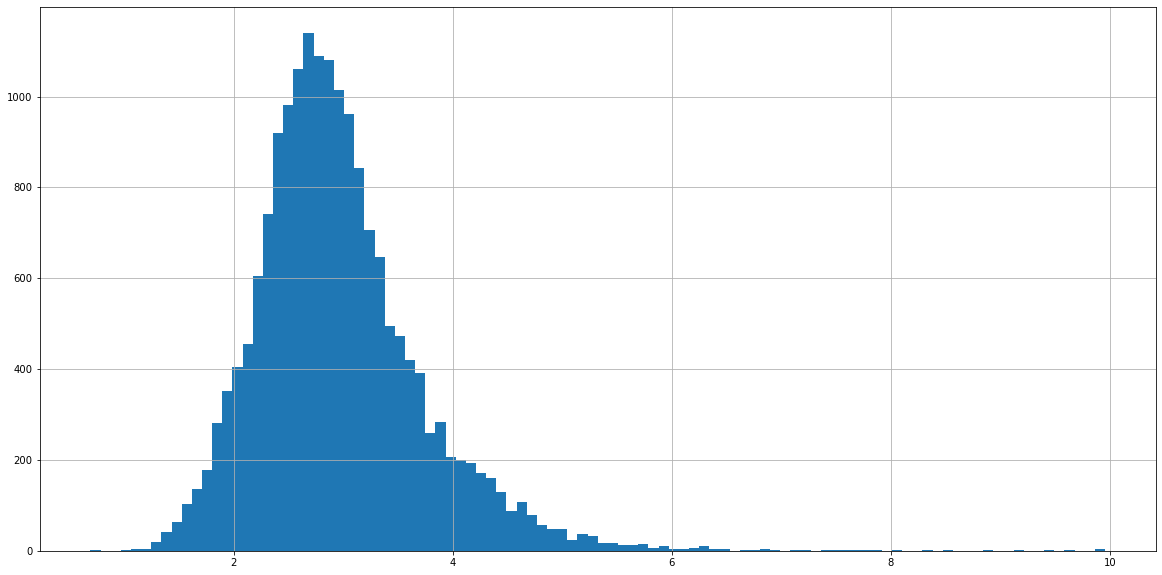

In [52]:
data['households'][data['households']<10].hist(bins=100,figsize=(20,10))

In [53]:
data['households'][data['households']>=10].value_counts().sum()

22

3) rooms

20 이상에서 큰 값들이 64개 존재, 20 이상 제거

<AxesSubplot:>

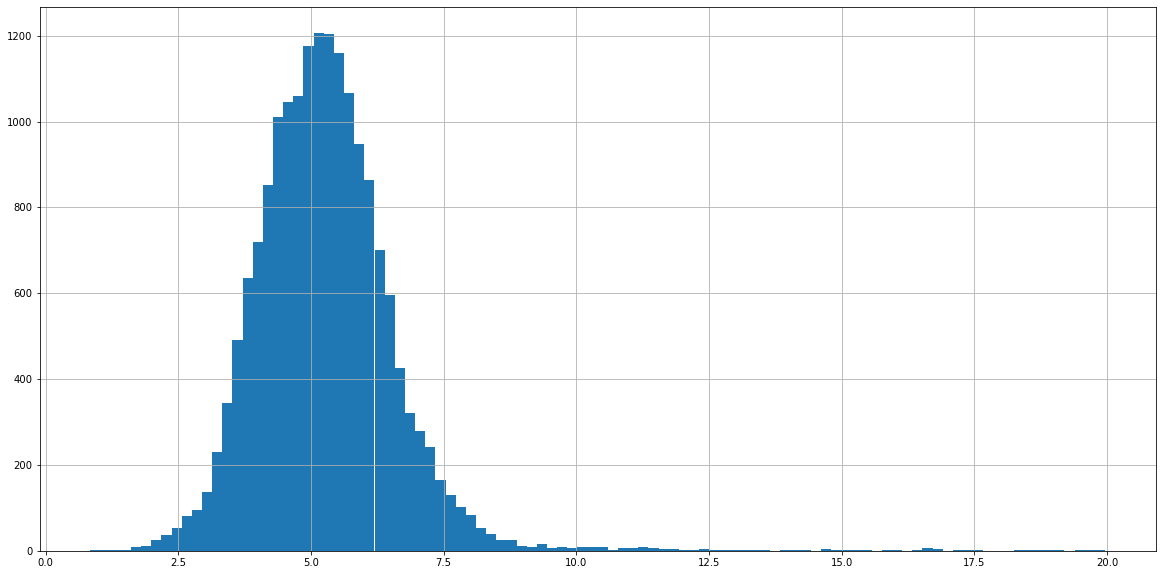

In [56]:
data['rooms'][data['rooms']<20].hist(bins=100, figsize=(20,10))

In [58]:
data['rooms'][data['rooms']>=20].value_counts().sum()

64

### 정제 데이터셋 생성

In [70]:
new_data = data[(data['bedrooms']<0.5)&(data['households']<7)& (data['rooms']<12) ]

In [73]:
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

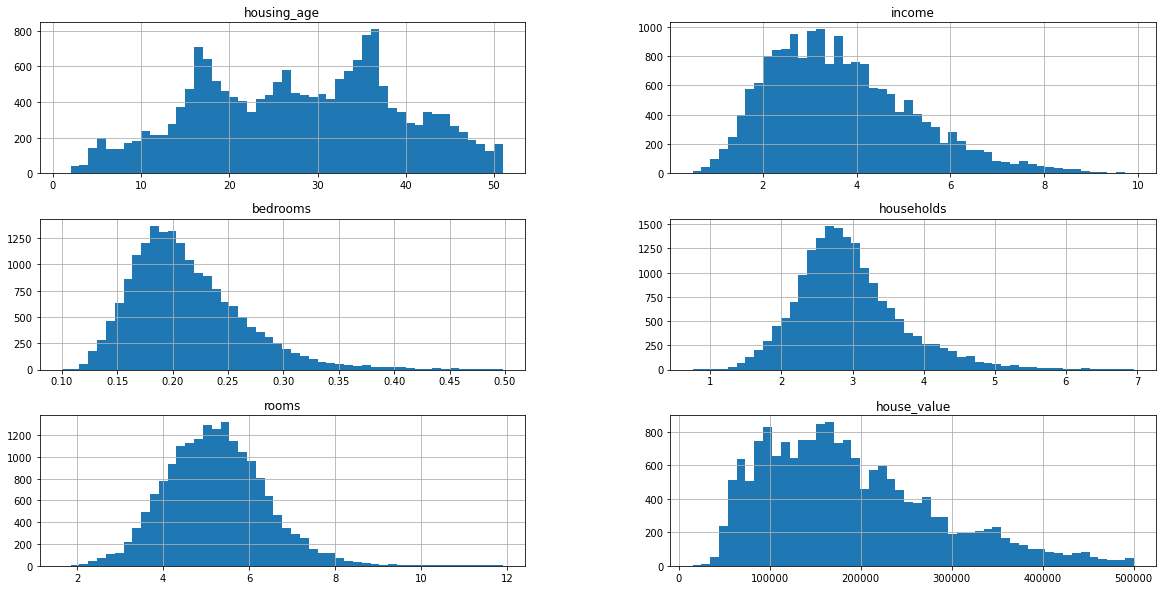

In [74]:
new_data.hist(bins=50, figsize=(20,10))

### 정제 후 선형회귀 적용

In [83]:
X = new_data[new_data.columns[0:5]]
y = new_data[[new_data.columns[5]]]

학습용 데이터, 테스트용 데이터 구분

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

데이터 정규화 mim-max

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

선형모델 적용

In [126]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled_minmax_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

훈련데이터 정확도 (R-square 설명력 확인)

In [127]:
pred_train= model.predict(X_scaled_minmax_train)
print("모델의 정확도:{:>0.5f}".format(model.score(X_scaled_minmax_train,y_train)))

모델의 정확도:0.57069


테스트 모델의 정확도 (R-square 설명력 확인)

In [129]:
pred_test= model.predict(X_scaled_minmax_test)
print("모델의 정확도:{:>0.5f}".format(model.score(X_scaled_minmax_test,y_test)))

모델의 정확도:0.58261


In [130]:
new_data.to_csv("C:/Users/user/빅분기 실기/[1]BigData_data_최종본(0910)/new_house_price.csv",encoding='utf-8')